In [97]:
%matplotlib inline
from IPython import display
from ipywidgets import widgets
import numpy as np
import time 
from numpy.fft import rfft, irfft
import matplotlib.pyplot as plt

def CCR (dati,wnd):
    
    template=wnd.tolist()  

    #Zero padding

    for i in range(len(dati)-len(wnd)):
        template.append(0)

    # Fast Fourier Transform (FFT)
    datiFFT= rfft(dati)

    # Inverto il vettore template
    tempY = []
    while len(template) > 0:
        tempY.append(template.pop())

    Y = rfft(tempY)

    # Faccio la formula inversa della FFT

    CrossCorrelazione = irfft(datiFFT*Y)

    print(len(tempY))

    print(len(CrossCorrelazione))
    print(np.arange(len(dati)))

    plt.plot(np.arange(len(dati)),CrossCorrelazione)
    plt.xlabel("Campioni")
    plt.ylabel("CrossCorrelazione")


    plt.show()

    return(CrossCorrelazione)



52
52
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]


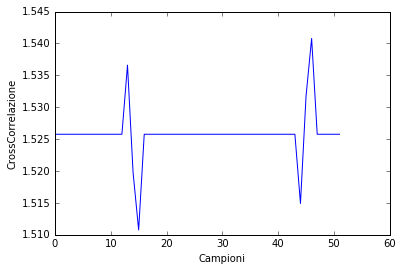

52
52
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]


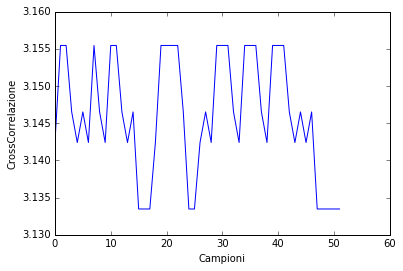

I picchi indicano un movimento durante il sonno, quindi più il segnale risulta stazionario più il sonno sarà tranquillo


In [98]:
%matplotlib inline
from IPython import display
from ipywidgets import widgets
import numpy as np
import time 
import math
wnd_dx=np.loadtxt("finestra_destra_basso.npy")
wnd_sx=np.loadtxt("finestra_sinistra_basso.npy")


DX=np.loadtxt("pillowONLINEfermo.npy")
SX=np.loadtxt("pillowONLINE2fermo.npy")


for i in range(len(DX)):
    if math.isnan(DX[i]):
        DX[i]=DX[i-1]
    
for i in range(len(SX)):
    if math.isnan(SX[i]):
        SX[i]=SX[i-1]
    
        
#cross-correlazione del template con il segnale generico

corrdx=CCR(DX,wnd_dx)

corrsx=CCR(SX,wnd_sx)

print("I picchi indicano un movimento durante il sonno, quindi più il segnale risulta stazionario più il sonno sarà tranquillo")

